# Time Series Final Project

This report is based on the excel spreadsheet named "data_exam.xlsx". 

*Authors: Sarra Ben Yahia & José Ángel García Sánchez*

###### 1. Explain the concept behind each column. What are these time series meant to represent? Transform these time series so that they are comparable in scale and order. 

For this report, we will study three time series to understand their joint relationship. To ensure comparability, we will convert all series to annual volatilities. We will annualize each series and convert variances to volatilities using the following formula derived from class:

We are going to work with variance instead of volatilities as variance has a natural relation with squared returns, volatilities with mean absolute returns. Our intuition make us think that the relation between the series gonna be monthly granularity and not daily because VIX are estimated over 30 days. 

$$Yearly Volatility = \sqrt(Daily Variance) * \sqrt(252)$$

where: $YearlyVolatility = \sqrt(YearlyVariance)$


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_excel("./data_exam.xlsx")
date_list=df.iloc[:,0]

datesFormated=pd.to_datetime(date_list, format="%d.%m.%Y")
volatility_series=df.iloc[:,1:4]

volatility_changes = volatility_series
volatility_changes.index = datesFormated

# df['Annualized Parkinson'] = df['Parkinson'] * np.sqrt(252)
# df['Annualized Squared Returns'] = df['Squared returns'] * 252

## create a StandardScaler object
# scaler = StandardScaler()

# # fit the scaler to the data and transform each column
# volatility_changes_scaled = pd.DataFrame(scaler.fit_transform(volatility_changes), index=volatility_changes.index, columns=volatility_changes.columns)

# print the first five rows of the scaled dataframe
print(volatility_changes.head())

              VIX  Parkinson  Squared returns
Unnamed: 0                                   
2000-01-04  27.01   0.001406         0.000612
2000-01-05  26.41   0.000002         0.000326
2000-01-06  25.73   0.000045         0.000169
2000-01-07  21.72   0.001577         0.000723
2000-01-10  21.71   0.000109         0.000111


<AxesSubplot:xlabel='Unnamed: 0'>

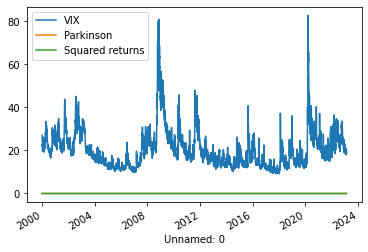

In [28]:
# before standard scaling
volatility_changes.plot()

<AxesSubplot:xlabel='Unnamed: 0'>

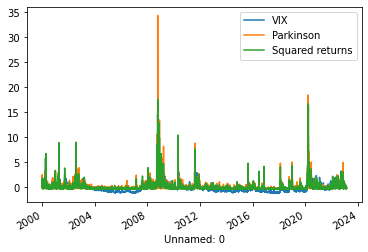

In [29]:
# after stantard scaling
volatility_changes_scaled.plot()

### **Description of the columns**

----

**Column B:**   
The VIX is a measure of market volatility often referred to as the "fear index." The VIX level represents the level of expected volatility in the S&P 500 index over the next 30 days. The VIX level is calculated based on the prices of options contracts on the S&P 500 index.

A higher VIX level indicates greater expected volatility, while a lower VIX level suggests a lower level of expected volatility. Generally, when the stock market experiences significant price fluctuations, the VIX level tends to increase, as investors become more uncertain and demand higher premiums for options contracts to hedge their positions. Conversely, when the market is relatively stable, the VIX level tends to be lower.

----

**Column C:**
The parkison estimates refers to the parkinson law formula (1980) used to estimate the volatility of stock prices.

Parkinson's law calculates the daily volatility of a stock by using the high and low prices of the day. The formula is as follows:

Parkinson's volatility estimate = (High price - Low price) / sqrt(2 * closing price)

Where:

- High price: the highest price of the stock during the day
- Low price: the lowest price of the stock during the day
- Closing price: the closing price of the stock for the day

The result of the formula represents the estimated standard deviation of the stock's daily returns. Parkinson's law is considered one of the simplest ways to estimate volatility, although it has some limitations and may not always accurately reflect the true volatility of a stock.

----

**Columns D:**
Squared returns are a measure of the volatility of an asset, such as a stock or a portfolio of stocks. They are obtained by squaring the daily returns of the asset.  

Daily returns are the percentage change in the price of an asset from one day to the next. Squaring the daily returns helps to emphasize large changes in the asset's price, as large returns are amplified when they are squared. The resulting squared returns can be summed over a period of time to give an estimate of the asset's volatility over that period.  

Squared returns are often used in financial modeling and risk management to estimate the volatility of an asset or portfolio of assets, which is an important measure of risk. Higher volatility means greater uncertainty and potential for larger price swings, while lower volatility suggests a more stable asset with smaller price fluctuations.  


---

###### Q2

In [38]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the ACF and PACF for each time series
for col in volatility_changes_scaled.columns:
    plot_acf(volatility_changes_scaled[col],lags=300, title=col+" ACF")
    plot_pacf(volatility_changes_scaled[col],lags=300, title=col+" PACF")


    # Estimate AR models of different orders based on the ACF and PACF
    # print(f"AR model for column {col}:")
    # for order in range(1, 6):
    #     # Fit the AR model of the specified order
    #     model = sm.tsa.ar_model.AutoReg(volatility_changes_scaled[col], lags=order, trend='c')
    #     results = model.fit(maxlag=order, trend='c')
        
    #     # Print the order, AIC value, and parameter estimates
    #     print(f"Order {order}: AIC={results.aic:.2f}")
    #     print(results.params)
    # print()

NameError: name 'volatility_seriesf' is not defined